Observação: Esse algoritmo não é bom para o caso de fazer atualizações da envoltória ao adicionar um ponto.

A implementação até agora não funciona porque o algoritmo volta no primeiro ponto na primeira iteração.

In [33]:
# Implementacao da sala de aula:

# encontrar o ponto de menor coordenada y
# seja o esse o ponto i0 da envoltoria
# i = i0

# repita
    # para cada um dos pontos j != i
    #   computar o angulo polar na direcao anti-horaria a partir de pi (ultimo vertice a entrar na envoltoria)

    # seja k o indice do ponto com menor angulo
    # o ponto pk entra na envoltoria
    # i = k
# ate que i == i0

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

In [122]:
def envoltoria_convexa(pontos):
    """Construcao da envoltoria convexa a partir de um conjunto de pontos.

    Entrada:
    pontos - um numpy array representando o conjunto de pontos, em que cada ponto é um numpy array [x, y]
    Saida:
    H - um numpy array contendo os pontos da envoltoria convexa
    """
    S = pontos
    p0 = min(S, key = lambda x: x[1])
    #### achar um jeito de deletar o ponto 0 do conjunto
    H = [p0]
    pi = p0
    
    while True:
        norm = np.zeros(len(S))
        for j in range(len(S)): 
            if S[j][0] != pi[0] or S[j][1] != pi[1]:
                cross = np.cross(pi, S[j])
                norm[j] = np.linalg.norm(cross)

        m = np.ma.MaskedArray(norm, norm <= 0)
        k = np.argmin(m)
        pi = S[k]
        np.delete(S, k)

        if pi[0] == p0[0] and pi[1] == p0[1]:
            break

        H.append(pi)       

    return H

In [125]:
# rng = np.random.default_rng()
# points = rng.random((10, 2))   # 10 random points in 2-D
# points = np.floor(points*10)
# points

In [124]:
points = np.array(([2, 1], [15, 9], [4, 11], [3, 6], [12, 15], [8,10]))
hull = envoltoria_convexa(points)
hull

[array([2, 1]), array([15,  9])]

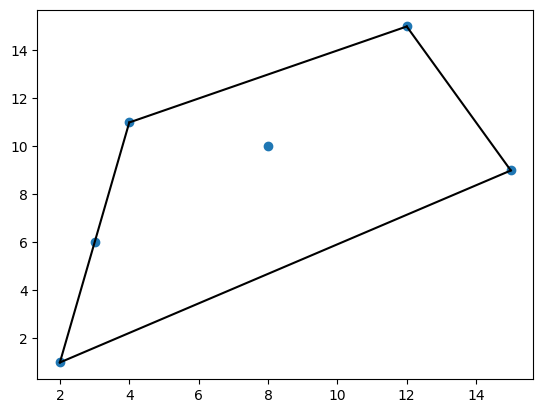

In [110]:
hull = ConvexHull(points)


plt.plot(points[:,0], points[:,1], 'o')

for simplex in hull.simplices:

    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')